### 📘 Tutorial Overview

This Tutorial is designed for beginners who have a foundational understanding of Python and basic statistical concepts. It builds upon the first tutorial and guides you through a more hands-on machine learning workflow, focusing on how data preprocessing and feature selection affect model performance.

The tutorial is divided into three major sections:

**Data Pre-processing and Visualization** — Learn how to clean and prepare data for modeling. This includes handling missing values, standardizing features, and visualizing class distributions to understand dataset balance.

**Feature Selection and Model Training** — Explore how to identify and retain the most relevant features using feature selection techniques, then train a classification model both with and without feature selection to compare performance.

**Model Evaluation and Comparison** — Evaluate model effectiveness using metrics such as accuracy and the confusion matrix, and interpret how feature selection impacts predictive performance.

### 🎯 Learning Focus

The main goal of this tutorial is to help you understand the end-to-end process of training and evaluating an ML model, while gaining insight into how preprocessing and feature selection influence the results. The focus remains on practical implementation, enabling you to directly apply these techniques to your own machine learning projec

In [2]:
### Python Libraries ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest, chi2
### Python Libraries ###

### Section 1: Data Pre-processing

In this tutorial, we will use the Arcene dataset from the UCI Machine Learning Repository. The Arcene dataset consists of 10,000 continuous features and includes two distinct classes: cancer samples (labeled as +1) and normal samples (labeled as –1). It serves as a benchmark dataset for feature selection and binary classification, offering a challenging scenario due to its high dimensionality and relatively small number of samples.

For more information on the dataset, please visit https://archive.ics.uci.edu/dataset/167/arcene

#### Step 1: Load and Read the Training data
In this step, we load the Arcene training dataset along with its corresponding labels. The feature data is read from the .data file, and any empty columns caused by extra spaces are removed to ensure data consistency. The label data, read from the .labels file, is then flattened into a one-dimensional array using ravel() and converted into a Pandas Series. This format ensures compatibility with machine learning libraries such as scikit-learn, which require target labels to be in a 1D structure.

In [3]:
# Load feature data [1]
xTrain = pd.read_csv("data/ARCENE_dataset/arcene_train.data", header=None, sep=' ')

# Some .data files have extra spaces, remove empty columns
xTrain = xTrain.dropna(axis=1, how='all')

# Read labels
yTrain = pd.read_csv("data/ARCENE_dataset/arcene_train.labels", header=None, sep=' ')

# Convert labels to 1D array
yTrain = pd.Series(yTrain.values.ravel())

print(xTrain.shape, yTrain.shape)

(100, 10000) (100,)


#### Step 2: Load and Read the Test data

In [4]:
# Load feature data [1]
xTest = pd.read_csv("data/ARCENE_dataset/arcene_valid.data", header=None, sep=' ')

# Some .data files have extra spaces, remove empty columns
xTest = xTest.dropna(axis=1, how='all')

# Read labels
yTest = pd.read_csv("data/ARCENE_dataset/arcene_valid.labels", header=None, sep=' ')

# Convert labels to 1D array
yTest = pd.Series(yTest.values.ravel())

print(xTest.shape, yTest.shape)

(100, 10000) (100,)


#### Step 3: Concatenate the two DataFrames
In this step, We concatenate two DataFrames to combine training and testing data (or multiple feature sets) into a single dataset for unified processing. This helps ensure consistent transformations and easier feature selection across all samples.

In [5]:
#combine the two dataFrames
X_full = pd.concat([xTrain, xTest], axis=0).reset_index(drop=True) #Concatenate training and test dataset features [3]
y_full = pd.concat([yTrain, yTest], axis=0).reset_index(drop=True) #Concatenate training and test target labels [3]

#### Step 4: Replace -1 with 0 in Target 
In many machine learning models, target labels must be in a binary format of 0 and 1. Therefore, we replace all -1 values with 0 to standardize the labels for compatibility with algorithms that do not recognize negative class labels.

In [6]:
y_full = y_full.replace(-1, 0) #[4]

#### Step 5: Appling MinMaxScalar
The MinMaxScaler is used to scale features to a range of [0, 1], ensuring all values are non-negative. This is important because feature selection methods such as the Chi-square (χ²) test, which is used in this tutorial, require all feature values to be non-negative in order to compute valid statistics.

In [7]:
scaler = MinMaxScaler()                                       # [5]
SS_X = scaler.fit_transform(X_full)                           # Apply the scaler to the feature data and transform it to standardized values
SS_X = pd.DataFrame(SS_X, columns=X_full.columns)              # Converting to pandas dataframe

#### Step 6: Visualizing class distribution

Here, we create a pie chart to see the percentage of the two classes in the dataset.


Class Distribution:
Counter({0: 112, 1: 88})


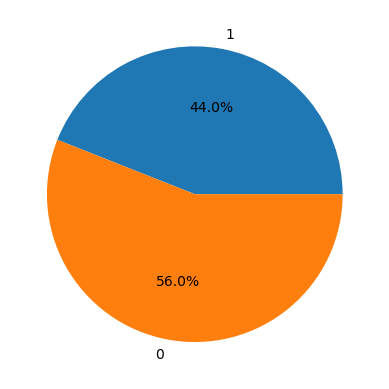

In [8]:
# === Summary Statistics ===
print("\nClass Distribution:")
print(Counter(y_full))

# === Visualization === 
ClassDir = Counter(y_full)              # Counter calculates occurrences of each class [6]
y = np.array(list(ClassDir.values()))       # Converting ClassDir to NumPy array for plotting
labels = list(ClassDir.keys())              # Extract the class labels from the counter
plt.pie(y,                                  # Create a pie char [7]
        labels=labels, 
        autopct='%1.1f%%');   

#### Step 7: Split the dataset into train and test sets

Using the train_test_split function, we divide the data into training and testing sets. This allows us to evaluate the model’s performance on unseen data, simulating real-world scenarios. By setting test_size=0.6, 60% of the data is reserved for testing, while 40% is used for training. The random_state=42 ensures consistent shuffling of the data for reproducibility, which helps prevent the model from learning unintended patterns based on the order of the data.

In [9]:
#Classification with feaure selection
# ===========================================
# TRAIN / TEST SPLIT
# ===========================================
x_train, x_test, y_train, y_test = train_test_split(SS_X, y_full, test_size=0.6, random_state=42) # [8]


#### Step 8: Intialize, train and Evalute the Model
In this tutorial, we use Logistic Regression, a widely used supervised learning algorithm for binary classification tasks. It models the probability that a sample belongs to a particular class using a logistic (sigmoid) function. Logistic regression is widely preferred because it is simple, efficient, and interpretable. It performs well on linearly separable data and provides meaningful coefficients that indicate the influence of each feature on the outcome. Additionally, it supports regularization, which helps prevent overfitting and improves the model’s generalization to unseen data.

We evaluate the Logistic Regression model using accuracy on the test data, which measures the proportion of correct predictions out of all predictions made. This metric offers a simple and intuitive way to assess how well the model distinguishes between the two classes.

Additionally, we use a confusion matrix to gain deeper insights into the model’s performance. By comparing the true labels with the predicted labels, the confusion matrix not only shows the number of correct classifications but also highlights specific misclassifications. This helps us understand where the Logistic Regression model performs well and where it may need improvement.

Model Accuracy:  0.775


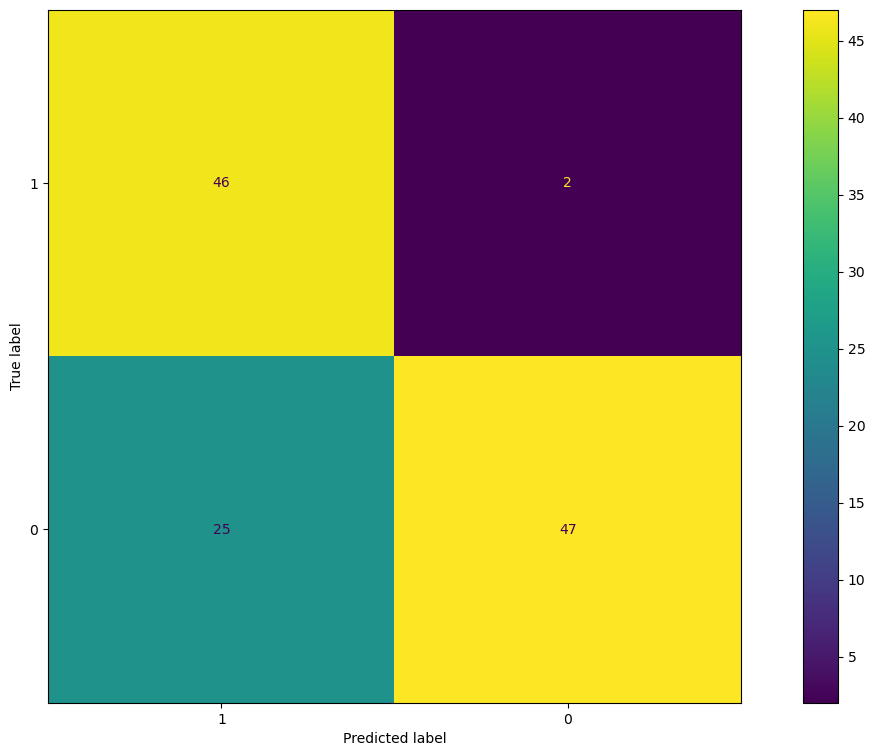

In [10]:
# Train Logistic Regression on data with no feature selection
Model = LogisticRegression(max_iter=1000) #[9]

Model.fit(x_train, y_train)
Predictions = Model.predict(x_test)   

# Accuracy
Accuracy = accuracy_score(Predictions, y_test)    # Calculate the accuracy by comparing predictions with the true test labels [10]            
print("Model Accuracy: ", Accuracy)

# Confusion Matrix
ConfusionMatrix = confusion_matrix(Predictions, y_test)  # Generate the confusion matrix by comparing predictions with the true test labels
Display = ConfusionMatrixDisplay(ConfusionMatrix,           # Create a confusion matrix display with the original class labels [11]
                                 display_labels=labels)          
Fig, Ax = plt.subplots(figsize=(16, 9))                     # Create a figure with a specified size of 16x9 for the confusion matrix plot
Display.plot(ax=Ax);  

#### Step 9: Feature Selection using SelectKBest
In this step, we use SelectKBest, a feature selection method that selects the top k features based on a chosen statistical test—in this case, the Chi-square (χ²) test. This approach helps identify the most relevant features that have the strongest relationship with the target variable, improving model performance and reducing computational complexity.

In the given code, we evaluate how the number of selected features (k) affects the model’s accuracy. For each value of k, we fit the SelectKBest method, transform the dataset to retain only the top k features, and then perform 5-fold cross-validation using Logistic Regression to compute the mean accuracy. Finally, we plot the results to visualize how model accuracy changes with different numbers of selected features, helping determine the optimal feature subset size for the best performance.

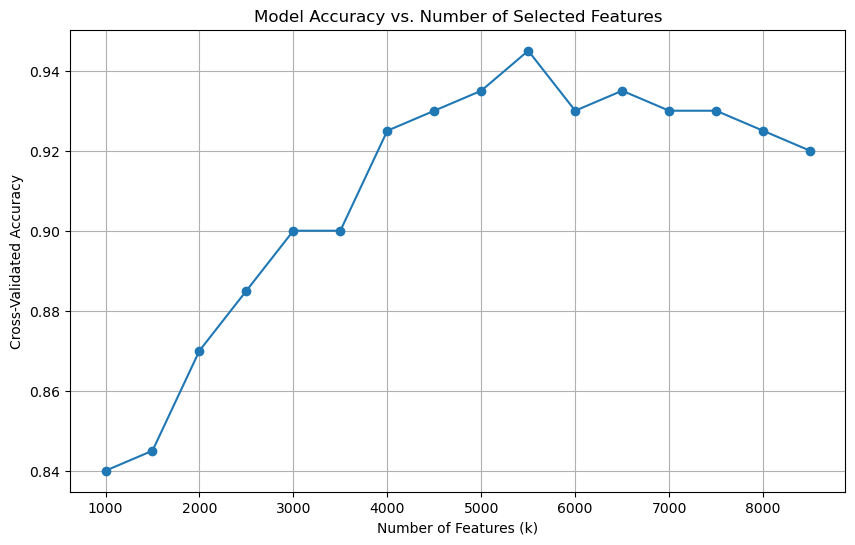

In [11]:
#Store mean accuracy for each k
from sklearn.model_selection import cross_val_score

Model = LogisticRegression(max_iter=1000)  #[9] 

scores = []  # Define list to store mean cross-validation scores
k_values = [x for x in range(1000, 9000, 500)]  # Define range of 'k' values (number of top features to select)
            
for k in k_values:
    s = SelectKBest(score_func=chi2, k=k).fit(SS_X, y_full)  ## Select top 'k' features based on chi-squared (χ²) statistical test [12]
    X_new = s.transform(SS_X)    # Transform feature set to retain only the top 'k' features
    
    cv_scores = cross_val_score(Model, X_new, y_full, cv=5)  # Perform 5-fold cross-validation on the reduced feature set[13]
    scores.append(np.mean(cv_scores)) # Append mean cross-validation score for the current 'k' value

# Plot results
plt.figure(figsize=(10,6))
plt.plot(k_values, scores, marker='o')
plt.title('Model Accuracy vs. Number of Selected Features')
plt.xlabel('Number of Features (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.show()

#### Step 10: Find the Optimal Number of Features

After evaluating model performance for different values of k, we identify the optimal number of features that yields the highest mean cross-validated accuracy. Using np.argmax(scores), we locate the index of the maximum accuracy in our results and select the corresponding k value. This optimal k represents the best trade-off between including informative features and avoiding unnecessary or noisy ones, helping the Logistic Regression model achieve its best performance.

In [12]:
# Find optimal k (with highest mean accuracy)
optimal_k = k_values[np.argmax(scores)]
print(f"Optimal number of features (k): {optimal_k}")

Optimal number of features (k): 5500


#### Step 11: Apply Feature Selector to Train and Test Sets

Once the optimal number of features (k) is determined, we fit the SelectKBest selector on the training set to avoid data leakage. We then transform both the training and test sets to retain only the top k features. This ensures that the Logistic Regression model is trained and evaluated using the most relevant features, improving performance while maintaining a fair and unbiased assessment on unseen data.

In [13]:
# === APPLY SELECTOR TO TRAIN & TEST SET ===
# # Fit the feature selector on the training data using the optimal number of features (optimal_k)
final_selector = SelectKBest(score_func=chi2, k=optimal_k).fit(SS_X, y_full)

# Transform both training and test sets to retain only the selected top 'k' features
X_train_k = final_selector.transform(x_train)
X_test_k = final_selector.transform(x_test)

#### Step 11: Train and Evaluate Logistic Regression on Selected Features

Here, we train a Logistic Regression model using the dataset reduced to the top k features from the previous step. The model is fitted on the training data, and predictions are made on the test set.

We evaluate the Logistic Regression model using accuracy and a confusion matrix, which together measure correct predictions and reveal misclassification patterns for the selected features.

Model Accuracy:  0.8416666666666667


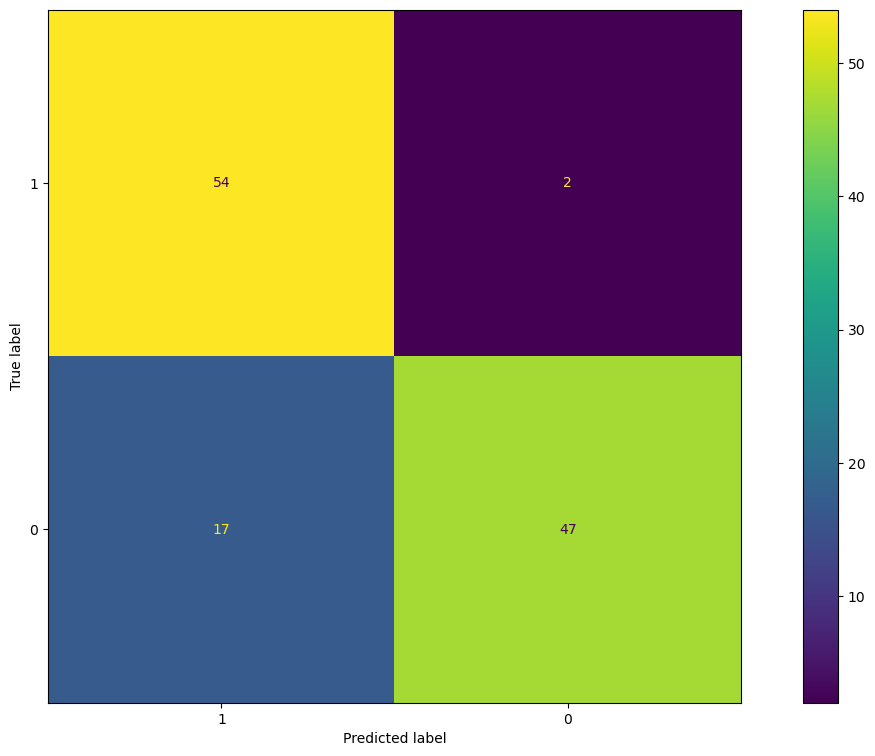

In [14]:
# Train Logistic Regression on data with no feature selection
Model = LogisticRegression(max_iter=1000)  #[9]

Model.fit(X_train_k, y_train)
Predictions = Model.predict(X_test_k)   

# Accuracy
Accuracy = accuracy_score(Predictions, y_test)    # Calculate the accuracy by comparing predictions with the true test labels [10]            
print("Model Accuracy: ", Accuracy)

# Confusion Matrix
ConfusionMatrix = confusion_matrix(Predictions, y_test)  # Generate the confusion matrix by comparing predictions with the true test labels
Display = ConfusionMatrixDisplay(ConfusionMatrix,           # Create a confusion matrix display with the original class labels [11]
                                 display_labels=labels)          
Fig, Ax = plt.subplots(figsize=(16, 9))                     # Create a figure with a specified size of 16x9 for the confusion matrix plot
Display.plot(ax=Ax);   

#### References
[1] https://www.geeksforgeeks.org/reading-excel-file-using-python/ <br>
[2] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html <br>
[3] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html <br>
[4] https://pandas.pydata.org/pandas-docs/version/0.15/generated/pandas.DataFrame.replace.html <br>
[5] https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/ <br>
[6] https://www.geeksforgeeks.org/python-counter-objects-elements/ <br>
[7] https://www.w3schools.com/python/matplotlib_pie_charts.asp <br>
[8] https://www.geeksforgeeks.org/how-to-split-the-dataset-with-scikit-learns-train_test_split-function/ <br>
[9] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
[10] https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.LabelEncoder.html <br>
[11] https://www.w3schools.com/python/python_ml_confusion_matrix.asp <br>
[12] https://scikit-learn.org/0.17/modules/generated/sklearn.feature_selection.SelectKBest.html
[13] https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
[14] https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html <br>
[15] https://archive.ics.uci.edu/dataset/167/arcene <br>

#### Authors
1) Shivangi Gupta (s1gupta@odu.edu)
2) Suzanne T Parete-Koon (paretekoonst@ornl.gov)